### Dataset Reading

In [ ]:
import pandas as pd 
data = pd.read_excel('drive/My Drive/HASOC Competition Data/hasoc_2020_de_train_new.xlsx')
pd.set_option('display.max_colwidth',150)
data.head(10)

,tweet_id,text,task1,task2,ID
0,1133388798925189122,Deutsche rothaarige porno reife deutsche frauen porno. Deutsche politessen pornos porno deutsch inzets. https://t.co/xAag87Y0Jd,NOT,NONE,hasoc_2020_de_2684
1,1127134592517980161,RT @NDRinfo: Die deutsche Klimaaktivistin Luisa Neubauer wirft Kanzlerin Merkel wegen ihrer fehlenden Unterstützung für den europäischen Kl…,NOT,NONE,hasoc_2020_de_1042
2,1128897106171842560,"@ruhrbahn jeden Morgen eine neue „Fahrzeugstörung“, ihr seid einfach nur zum Kotzen",NOT,NONE,hasoc_2020_de_774
3,1123576753199484928,"@Junge_Freiheit Die Inkas hatten sich schon dämlich angestellt, bei den spanischen Eindringlingen, aber der Deutsche toppt dann doch alles",NOT,NONE,hasoc_2020_de_559
4,1128743783393312768,RT @technosteron: leute die 'boar' schreiben lassen sich bestimmt auch von ihren analphabetischen Vater in arsch ficken,HOF,PRFN,hasoc_2020_de_1969
5,1134139256375525376,ich habe mir gerade diese dorne aus meinem arsch gezogen https://t.co/x40mpKgBZN,HOF,PRFN,hasoc_2020_de_2926
6,1132759271618293761,RT @Schrammi44: Er ist einfach der GOAT @Bouncaay https://t.co/bb9b5SWaKi,NOT,NONE,hasoc_2020_de_2994
7,1131107693123526657,KFM Deutsche Mittelstand AG: Deutscher Mittelstandsanleihen FONDS zeichnet neue Hörmann-Anleihe mit Mindest-Kupon 4… https://t.co/5HeRedf9cx,NOT,NONE,hasoc_2020_de_1574
8,1133093570229997573,"@mentalshards_ ich will jetzt nicht offenden oder so, ich will einfach nur, das die scheiße weniger wird",HOF,PRFN,hasoc_2020_de_1480
9,1126898700683501569,RT @SteinbachErika: Einfach skandalös! https://t.co/dC5NXFbviQ,NOT,NONE,hasoc_2020_de_3224


In [ ]:
data.shape

(2373, 5)

In [ ]:
print(data.dtypes)

tweet_id     int64
text        object
task1       object
task2       object
ID          object
dtype: object


### Making of "label" Variable

In [ ]:
label = data['task1']
label.head()

0    NOT
1    NOT
2    NOT
3    NOT
4    HOF
Name: task1, dtype: object

### Checking Dataset Balancing

NOT    1700
HOF     673
Name: task1, dtype: int64


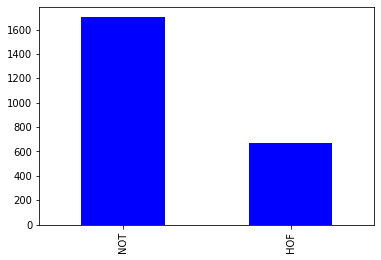

In [ ]:
print(label.value_counts())
import matplotlib.pyplot as plt
label.value_counts().plot(kind='bar', color='blue')

### Convering label into "0" or "1"

In [ ]:
import numpy as np
classes_list = ["HOF","NOT"]
label_index = data['task1'].apply(classes_list.index)
final_label = np.asarray(label_index)
print(final_label[:10])

[1 1 1 1 0 0 1 1 0 1]


In [ ]:
from keras.utils.np_utils import to_categorical
label_twoDimension = to_categorical(final_label, num_classes=2)

In [ ]:
print(label_twoDimension[:10])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


### Making of "text" Variable

In [ ]:
text = data['text']
text.head(10)

0                 Deutsche rothaarige porno reife deutsche frauen porno. Deutsche politessen pornos porno deutsch inzets. https://t.co/xAag87Y0Jd
1    RT @NDRinfo: Die deutsche Klimaaktivistin Luisa Neubauer wirft Kanzlerin Merkel wegen ihrer fehlenden Unterstützung für den europäischen Kl…
2                                                             @ruhrbahn jeden Morgen eine neue „Fahrzeugstörung“, ihr seid einfach nur zum Kotzen
3      @Junge_Freiheit Die Inkas hatten sich schon dämlich angestellt, bei den spanischen Eindringlingen, aber der Deutsche toppt dann doch alles
4                         RT @technosteron: leute die 'boar' schreiben lassen sich bestimmt auch von ihren analphabetischen Vater in arsch ficken
5                                                                ich habe mir gerade diese dorne aus meinem arsch gezogen https://t.co/x40mpKgBZN
6                                                                       RT @Schrammi44: Er ist einfach der GOAT @Bouncaay ht

### Dataset Pre-processing

In [ ]:
import re 

def text_clean(text):
    ''' Pre process and convert texts to a list of words '''
    
    text=text.lower()

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub('https?://\S+|www\.\S+', "", text)
    text = re.sub(r"rt", " ", text)

    return text

In [ ]:
clean_text = text.apply(lambda x:text_clean(x))

In [ ]:
clean_text.head(10)

0                                       deutsche rothaarige porno reife deutsche frauen porno. deutsche politessen pornos porno deutsch inzets. 
1       ndrinfo: die deutsche klimaaktivistin luisa neubauer wirft kanzlerin merkel wegen ihrer fehlenden unterst tzung f r den europ ischen kl 
2                                                             ruhrbahn jeden morgen eine neue  fahrzeugst rung , ihr seid einfach nur zum kotzen
3      junge freiheit die inkas hatten sich schon d mlich angestellt, bei den spanischen eindringlingen, aber der deutsche toppt dann doch alles
4                            technosteron: leute die 'boar' schreiben lassen sich bestimmt auch von ihren analphabetischen vater in arsch ficken
5                                                                                      ich habe mir gerade diese dorne aus meinem arsch gezogen 
6                                                                                                 schrammi44: er ist einfach der g

### Removing stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def stop_words_removal(text1):
    text1=[w for w in  text1.split(" ")  if w not in stopwords.words('german')]
    return " ".join(text1)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
clean_text_ns=clean_text.apply(lambda x: stop_words_removal(x))

In [ ]:
print(clean_text_ns.head(10))

0                         deutsche rothaarige porno reife deutsche frauen porno. deutsche politessen pornos porno deutsch inzets. 
1       ndrinfo: deutsche klimaaktivistin luisa neubauer wirft kanzlerin merkel wegen fehlenden unterst tzung f r europ ischen kl 
2                                                                      ruhrbahn morgen neue  fahrzeugst rung , seid einfach kotzen
3                                         junge freiheit inkas schon d mlich angestellt, spanischen eindringlingen, deutsche toppt
4                                         technosteron: leute 'boar' schreiben lassen bestimmt analphabetischen vater arsch ficken
5                                                                                                      gerade dorne arsch gezogen 
6                                                                                              schrammi44: einfach goat  bouncaay 
7                kfm deutsche mittelstand ag: deutscher mittelstandsanleihen fonds 

### Lemmatization

### Stemming

In [ ]:
# Stemming
from nltk.stem import SnowballStemmer 
stemmer = SnowballStemmer("german")

def word_stemmer(text):
    stem_text = "".join([stemmer.stem(i) for i in text])
    return stem_text

In [ ]:
clean_text_stem = clean_text_ns.apply(lambda x : word_stemmer(x))

In [ ]:
print(clean_text_stem.head())

0                         deutsche rothaarige porno reife deutsche frauen porno. deutsche politessen pornos porno deutsch inzets. 
1       ndrinfo: deutsche klimaaktivistin luisa neubauer wirft kanzlerin merkel wegen fehlenden unterst tzung f r europ ischen kl 
2                                                                      ruhrbahn morgen neue  fahrzeugst rung , seid einfach kotzen
3                                         junge freiheit inkas schon d mlich angestellt, spanischen eindringlingen, deutsche toppt
4                                         technosteron: leute 'boar' schreiben lassen bestimmt analphabetischen vater arsch ficken
Name: text, dtype: object


### Tokenization using "keras"

In [ ]:
import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
tok_all = Tokenizer(filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', lower=True, char_level = False)
tok_all.fit_on_texts(clean_text_stem)

### Making Vocab for words

In [ ]:
vocabulary_all = len(tok_all.word_counts)
print(vocabulary_all)

8820


In [ ]:
l = tok_all.word_index
print(l)

{'einfach': 1, 'deutsche': 2, 'f': 3, 'gr': 4, 'r': 5, 'arsch': 6, 'gt': 7, 'merkel': 8, 'schon': 9, 'schei': 10, 'mal': 11, 'nen': 12, 'w': 13, 'h': 14, 'nazis': 15, 'dumm': 16, 'e': 17, 'frauen': 18, 'k': 19, 'halt': 20, 'm': 21, 'ab': 22, 'porno': 23, 'welt': 24, 'ne': 25, 'linken': 26, 'mehr': 27, 'tagesschau': 28, 'ck': 29, 't': 30, 'hurensohn': 31, 'ja': 32, 's': 33, 'echt': 34, 'd': 35, 'gibt': 36, 'gratis': 37, 'islam': 38, 'deutschland': 39, 'immer': 40, 'n': 41, 'frau': 42, 'politiker': 43, 'l': 44, 'linke': 45, 'pack': 46, 'warum': 47, 'en': 48, 'kopf': 49, 'erst': 50, 're': 51, 'eigentlich': 52, 'ber': 53, 'b': 54, 'leute': 55, 'fresse': 56, 'stimmt': 57, 'idioten': 58, '2': 59, 'dumme': 60, 'afd': 61, 'zdfheute': 62, 'macht': 63, '1': 64, 'rde': 65, 'g': 66, 'kinder': 67, 'kotzen': 68, 'scheisse': 69, 'europa': 70, 'sch': 71, 'nazi': 72, 'nicht': 73, 'chte': 74, 'deutschen': 75, 'pa': 76, 'geh': 77, 'deutsch': 78, 'lassen': 79, 'politik': 80, 'gen': 81, 'ma': 82, 'i': 83, 

### encoding or sequencing

In [ ]:
encoded_clean_text_stem = tok_all.texts_to_sequences(clean_text_stem)
print(clean_text_stem[0])
print(encoded_clean_text_stem[0])

deutsche rothaarige porno reife deutsche frauen porno. deutsche politessen pornos porno deutsch inzets. 
[2, 2120, 23, 380, 2, 18, 23, 2, 2121, 104, 23, 78, 2122]


### Pre-padding

In [ ]:
from keras.preprocessing import sequence
max_length = 100
padded_clean_text_stem = sequence.pad_sequences(encoded_clean_text_stem, maxlen=max_length, padding='pre')

# Reading Test data and Pre-processing

In [ ]:
data_t = pd.read_csv('drive/My Drive/HASOC Competition Data/german_test_1509.csv')
pd.set_option('display.max_colwidth',150)
data_t.head(10)

,tweet_id,text,task1,task2,ID
0,1129095874242650112,@derCarsti Boykottieren hört sich besser an. 💙💙,NOT,NONE,hasoc_2020_de_1053
1,1129004308396236800,"RT @ibikus31: Es wird spekuliert, ob Merkel ein Amt in Brüssel übernimmt.\nWäre es so, wie schätzen Sie dann die Zukunft der Mitgliedstaaten…",NOT,NONE,hasoc_2020_de_671
2,1130896929355907080,Hat #Hitler wirklich den Krieg in der Wüste verloren? Nach der #Welt Schlagzeile hat die #Tagesschau nicht reagiert.,NOT,NONE,hasoc_2020_de_2977
3,1132251534329307136,"RT @Beatrix_vStorch: #May tritt in UK unter Tränen zurück. Wenn #Merkel zurücktritt, dann auch unter Tränen – unter den Freudentränen von M…",NOT,NONE,hasoc_2020_de_1746
4,1124941869115498496,@justmeDoro Eher nicht. Das Gänse hauen wieder ab in ihre warmen Überwinterungsquartiere. 😅😂,NOT,NONE,hasoc_2020_de_2416
5,1129712298531184641,"RT @VonSchwer: Ein guter Patriot geht von Bord‼️Gestürzt durch einen, vom ZDF finanzierten, linken Schmierenkomödianten 😡‼️ https://t.co/rl…",HOF,NONE,hasoc_2020_de_1112
6,1123981478361219073,@yooli_derechte @MontanaBlack Mich wundert es echt wie du noch keine Cockschelle bekommen hast. Du kinderfickender Hurensohn,HOF,OFFN,hasoc_2020_de_2938
7,1124978296628961287,Da war #SPD #Kuehnert und am Ende auch #Nahles einfach nur dumm: https://t.co/aj001ZKeWk,NOT,NONE,hasoc_2020_de_2205
8,1129473948813541376,"Nazan, komm bittebitte zurück, löse die „Punggdä“-Trulla ab und werde wieder LD-Moderatorin! 🙏🏻 #letsdance2019 #letsdance",NOT,NONE,hasoc_2020_de_387
9,1131048922527424512,"RT @Junge_Freiheit: Die europäische Spitzenkandidatin der Grünen im Europawahlkampf, Franziska Keller, hat sich für eine CO2-Steuer ausgesp…",NOT,NONE,hasoc_2020_de_459


In [ ]:
data_t.shape

(526, 5)

In [ ]:
print(data_t.dtypes)

tweet_id     int64
text        object
task1       object
task2       object
ID          object
dtype: object


In [ ]:
label_t = data_t['task1']
label_t.head()

0    NOT
1    NOT
2    NOT
3    NOT
4    NOT
Name: task1, dtype: object

NOT    392
HOF    134
Name: task1, dtype: int64


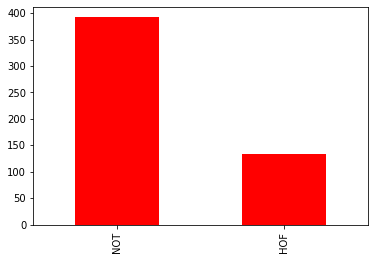

In [ ]:
print(label_t.value_counts())
import matplotlib.pyplot as plt
label_t.value_counts().plot(kind='bar', color='red')

In [ ]:
import numpy as np
classes_list_t = ["HOF","NOT"]
label_t_index = data_t['task1'].apply(classes_list_t.index)
final_label_t = np.asarray(label_t_index)
print(final_label_t[:10])

[1 1 1 1 1 0 0 1 1 1]


In [ ]:
from keras.utils.np_utils import to_categorical
label_twoDimension_t = to_categorical(final_label_t, num_classes=2)

In [ ]:
print(label_twoDimension_t[:10])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
text_t = data_t['text']
text_t.head(10)

0                                                                                                  @derCarsti Boykottieren hört sich besser an. 💙💙
1    RT @ibikus31: Es wird spekuliert, ob Merkel ein Amt in Brüssel übernimmt.\nWäre es so, wie schätzen Sie dann die Zukunft der Mitgliedstaaten…
2                             Hat #Hitler wirklich den Krieg in der Wüste verloren? Nach der #Welt Schlagzeile hat die #Tagesschau nicht reagiert.
3     RT @Beatrix_vStorch: #May tritt in UK unter Tränen zurück. Wenn #Merkel zurücktritt, dann auch unter Tränen – unter den Freudentränen von M…
4                                                     @justmeDoro Eher nicht. Das Gänse hauen wieder ab in ihre warmen Überwinterungsquartiere. 😅😂
5     RT @VonSchwer: Ein guter Patriot geht von Bord‼️Gestürzt durch einen, vom ZDF finanzierten, linken Schmierenkomödianten 😡‼️ https://t.co/rl…
6                     @yooli_derechte @MontanaBlack Mich wundert es echt wie du noch keine Cockschelle bekommen hast. 

In [ ]:
import re 

def text_clean(text):
    ''' Pre process and convert texts to a list of words '''
    
    text=text.lower()

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub('https?://\S+|www\.\S+', "", text)
    text = re.sub(r"rt", " ", text)

    return text

In [ ]:
clean_text_t = text_t.apply(lambda x:text_clean(x))

In [ ]:
clean_text_t.head(10)

0                                                                                                  dercarsti boykottieren h   sich besser an.   
1        ibikus31: es wird spekulie , ob merkel ein amt in br ssel  bernimmt. w re es so, wie sch tzen sie dann die zukunft der mitgliedstaaten 
2                            hat  hitler wirklich den krieg in der w ste verloren  nach der  welt schlagzeile hat die  tagesschau nicht reagie .
3       beatrix vstorch:  may tritt in uk unter tr nen zur ck. wenn  merkel zur cktritt, dann auch unter tr nen   unter den freudentr nen von m 
4                                                     justmedoro eher nicht. das g nse hauen wieder ab in ihre warmen  berwinterungsqua iere.   
5                       vonschwer: ein guter patriot geht von bord  gest rzt durch einen, vom zdf finanzie en, linken schmierenkom dianten      
6                     yooli derechte  montanablack mich wunde  es echt wie du noch keine cockschelle bekommen hast. du kinderficke

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def stop_words_removal(text1):
    text1=[w for w in  text1.split(" ")  if w not in stopwords.words('german')]
    return " ".join(text1)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
clean_text_t_ns=clean_text_t.apply(lambda x: stop_words_removal(x))

In [ ]:
print(clean_text_t_ns.head(10))

0                                                                              dercarsti boykottieren h   besser an.   
1                         ibikus31: spekulie , merkel amt br ssel  bernimmt. w re so, sch tzen zukunft mitgliedstaaten 
2                                          hitler wirklich krieg w ste verloren   welt schlagzeile  tagesschau reagie .
3                                  beatrix vstorch:  may tritt uk tr nen ck.  merkel cktritt, tr nen   freudentr nen m 
4                                               justmedoro eher nicht. g nse hauen ab warmen  berwinterungsqua iere.   
5                vonschwer: guter patriot geht bord  gest rzt einen, zdf finanzie en, linken schmierenkom dianten      
6                         yooli derechte  montanablack wunde  echt cockschelle bekommen hast. kinderfickender hurensohn
7                                                                             spd  kuehne  ende  nahles einfach dumm:  
8                      nazan, komm bitte

In [ ]:
# Stemming
from nltk.stem import SnowballStemmer 
stemmer = SnowballStemmer("german")

def word_stemmer(text):
    stem_text = "".join([stemmer.stem(i) for i in text])
    return stem_text

In [ ]:
clean_text_t_stem = clean_text_t_ns.apply(lambda x : word_stemmer(x))

In [ ]:
print(clean_text_t_stem.head(10))

0                                                                              dercarsti boykottieren h   besser an.   
1                         ibikus31: spekulie , merkel amt br ssel  bernimmt. w re so, sch tzen zukunft mitgliedstaaten 
2                                          hitler wirklich krieg w ste verloren   welt schlagzeile  tagesschau reagie .
3                                  beatrix vstorch:  may tritt uk tr nen ck.  merkel cktritt, tr nen   freudentr nen m 
4                                               justmedoro eher nicht. g nse hauen ab warmen  berwinterungsqua iere.   
5                vonschwer: guter patriot geht bord  gest rzt einen, zdf finanzie en, linken schmierenkom dianten      
6                         yooli derechte  montanablack wunde  echt cockschelle bekommen hast. kinderfickender hurensohn
7                                                                             spd  kuehne  ende  nahles einfach dumm:  
8                      nazan, komm bitte

In [ ]:
import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
tok_test = Tokenizer(filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', lower=True, char_level = False)
tok_test.fit_on_texts(clean_text_t_stem)

In [ ]:
vocabulary_all_test = len(tok_test.word_counts)
print(vocabulary_all_test)

2716


In [ ]:
test_list = tok_test.word_index
print(test_list)

{'gr': 1, 'r': 2, 'einfach': 3, 'f': 4, 'deutsche': 5, 'arsch': 6, 'schei': 7, 'merkel': 8, 'schon': 9, 'nen': 10, 'gt': 11, 'ab': 12, 'mal': 13, 'w': 14, 'h': 15, 'halt': 16, 'linken': 17, 'e': 18, 't': 19, 'dumm': 20, 'porno': 21, 'welt': 22, 'hurensohn': 23, 'immer': 24, 'k': 25, 'nazis': 26, 'm': 27, 'frau': 28, 'en': 29, 'ck': 30, 'mehr': 31, 'frauen': 32, 'l': 33, 'ja': 34, 'ne': 35, 'gratis': 36, 'echt': 37, 'warum': 38, 'tagesschau': 39, 'n': 40, 'islam': 41, 'gibt': 42, 'b': 43, 'kinder': 44, 'ficken': 45, 'pack': 46, 'heute': 47, 'idioten': 48, 'ber': 49, 'besser': 50, 're': 51, 'lange': 52, 'eu': 53, 'dumme': 54, 'gen': 55, 'schulz': 56, 'd': 57, 's': 58, '3': 59, 'linke': 60, 'rde': 61, 'fr': 62, 'erst': 63, 'st': 64, 'leben': 65, 'bild': 66, 'europa': 67, 'ist': 68, 'kopf': 69, 'ren': 70, 'sch': 71, 'kurz': 72, '5': 73, '12': 74, 'hasse': 75, 'deutschland': 76, 'de': 77, 'eigentlich': 78, 'fresse': 79, 'gabriel': 80, 'neue': 81, 'an': 82, 'br': 83, 'eher': 84, 'nicht': 85,

In [ ]:
encoded_clean_text_t_stem = tok_all.texts_to_sequences(clean_text_t_stem)
print(clean_text_t_stem[0])
print(encoded_clean_text_t_stem[0])

 dercarsti boykottieren h   besser an.   
[14, 103, 191]


In [ ]:
from keras.preprocessing import sequence
max_length = 100
padded_clean_text_t_stem = sequence.pad_sequences(encoded_clean_text_t_stem, maxlen=max_length, padding='pre')

# FastText Embeddings

In [ ]:
# FastText Embedding link - https://fasttext.cc/docs/en/crawl-vectors.html

import os
embeddings_index = {}
f = open('drive/My Drive/HASOC Competition Data/Copy of cc.de.300.vec',encoding='utf-8',errors='ignore')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 2000000 word vectors.


In [ ]:
embedding_matrix = np.zeros((vocabulary_all+1, 300))
for word, i in tok_all.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
         embedding_matrix[i] = embedding_vector

# **CNN 1 Model**

In [ ]:
from keras.preprocessing import sequence
from keras.preprocessing import text
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM
from keras.layers import Conv1D, Flatten
from keras.preprocessing import text
from keras.models import Sequential,Model
from keras.layers import Dense ,Activation,MaxPool1D,Conv1D,Flatten,Dropout,Activation,Dropout,Input,Lambda,concatenate
from keras.utils import np_utils
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import nltk
import csv
import pandas as pd

from keras.preprocessing import text as keras_text, sequence as keras_seq

In [ ]:
Embedding_Layer = Embedding(vocabulary_all+1, 300, weights=[embedding_matrix], input_length=max_length)

In [ ]:
CNN1_network=Sequential([Embedding_Layer,
                        Conv1D(128,3,activation="relu",padding='same'),
                       Dropout(0.2),
                       MaxPool1D(2),
                       Flatten(),
                       Dense(64,activation="relu"),
                       Dropout(0.3),
                       Dense(2,activation="sigmoid")
                       ])

In [ ]:
CNN1_network.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 300)          2646300   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 100, 128)          115328    
_________________________________________________________________
dropout_6 (Dropout)          (None, 100, 128)          0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 50, 128)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                409664    
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)               

In [ ]:
from keras.optimizers import Adam
CNN1_network.compile(loss = "binary_crossentropy", optimizer=Adam(lr=0.00003), metrics=["accuracy"])


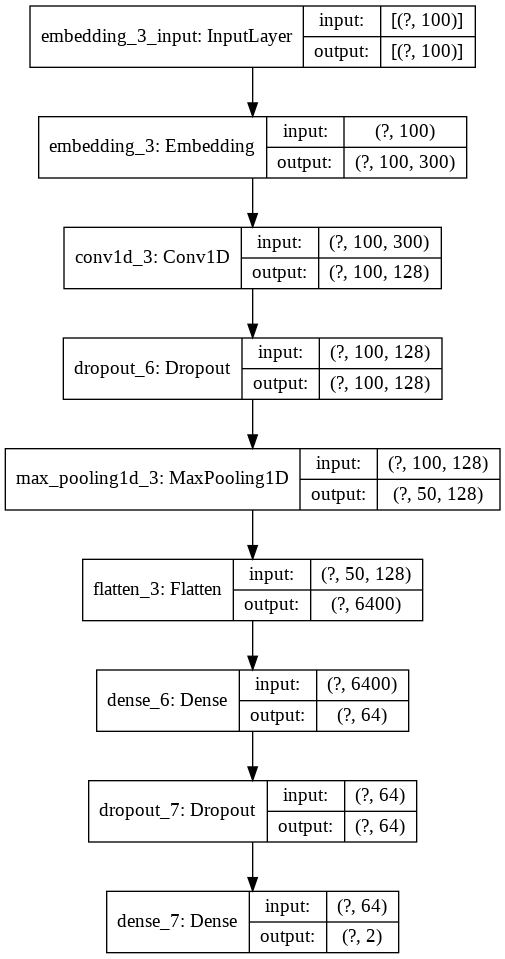

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(CNN1_network, to_file='CNN2_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
earlystopper = EarlyStopping(patience=8, verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9,
                              patience=2, min_lr=0.00001, verbose=1)

### **Model Fitting or Training**

In [ ]:
hist = CNN1_network.fit(padded_clean_text_stem,label_twoDimension,epochs=200,batch_size=32,callbacks=[earlystopper, reduce_lr])

Epoch 1/200
75/75 [==============================] - 3s 35ms/step - loss: 0.6655 - accuracy: 0.6650
Epoch 2/200
75/75 [==============================] - 3s 37ms/step - loss: 0.5986 - accuracy: 0.7164
Epoch 3/200
75/75 [==============================] - 3s 34ms/step - loss: 0.5861 - accuracy: 0.7164
Epoch 4/200
75/75 [==============================] - 3s 35ms/step - loss: 0.5828 - accuracy: 0.7164
Epoch 5/200
75/75 [==============================] - 3s 34ms/step - loss: 0.5808 - accuracy: 0.7164
Epoch 6/200
75/75 [==============================] - 3s 34ms/step - loss: 0.5771 - accuracy: 0.7164
Epoch 7/200
75/75 [==============================] - 3s 34ms/step - loss: 0.5692 - accuracy: 0.7164
Epoch 8/200
75/75 [==============================] - 3s 35ms/step - loss: 0.5667 - accuracy: 0.7164
Epoch 9/200
75/75 [==============================] - 3s 34ms/step - loss: 0.5547 - accuracy: 0.7164
Epoch 10/200
75/75 [==============================] - 3s 34ms/step - loss: 0.5432 - accuracy: 0.7168

# log loss

In [ ]:
CNN1_network_predictions = CNN1_network.predict(padded_clean_text_t_stem)

In [ ]:
from sklearn.metrics import log_loss
log_loss_test= log_loss(label_twoDimension_t,CNN1_network_predictions)
log_loss_test

1.0507800141103276

# Classification Report

In [ ]:
predictions = np.zeros_like(CNN1_network_predictions)
predictions[np.arange(len(CNN1_network_predictions)), CNN1_network_predictions.argmax(1)] = 1

In [ ]:
predictionInteger=(np.argmax(predictions, axis=1))
predictionInteger

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,

In [ ]:
pred_label = np.array(predictionInteger)
df = pd.DataFrame(data=pred_label , columns=["task1"])
print(df)

     task1
0        1
1        1
2        1
3        1
4        1
..     ...
521      1
522      1
523      1
524      1
525      1

[526 rows x 1 columns]


In [ ]:
df.to_csv("submission_DE_A.csv", index=False)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(label_twoDimension_t,predictions))

              precision    recall  f1-score   support

           0       0.70      0.54      0.61       134
           1       0.85      0.92      0.89       392

   micro avg       0.82      0.82      0.82       526
   macro avg       0.78      0.73      0.75       526
weighted avg       0.81      0.82      0.81       526
 samples avg       0.82      0.82      0.82       526



# Epoch v/s Loss Plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

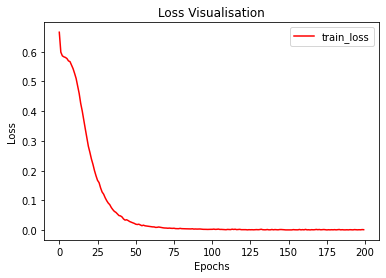

In [ ]:
from matplotlib import pyplot as plt
plt.plot(hist.history["loss"],color = 'red', label = 'train_loss')
#plt.plot(hist.history["val_loss"],color = 'blue', label = 'val_loss')
plt.title('Loss Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('CNN1_HASOC_Ger_lossPlot.pdf',dpi=1000)

from google.colab import files
files.download('CNN1_HASOC_Ger_lossPlot.pdf') 

# Epoch v/s Accuracy Plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

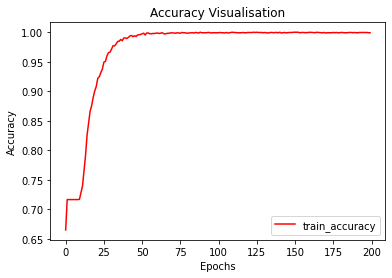

In [ ]:
plt.plot(hist.history["accuracy"],color = 'red', label = 'train_accuracy')
#plt.plot(hist.history["val_accuracy"],color = 'blue', label = 'val_accuracy')
plt.title('Accuracy Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('CNN1_HASOC_Ger_accuracyPlot.pdf',dpi=1000)
files.download('CNN1_HASOC_Ger_accuracyPlot.pdf') 

# Area under Curve-ROC

In [ ]:
pred_train = CNN1_network.predict(padded_clean_text_stem)
pred_test = CNN1_network.predict(padded_clean_text_t_stem)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

def plot_AUC_ROC(y_true, y_pred):
    n_classes = 2 #change this value according to class value

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
############################################################################################
    lw = 2
    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)
    
    colors = cycle(['aqua', 'darkorange'])
    #classes_list1 = ["DE","NE","DK"]
    classes_list1 = ["Non-duplicate","Duplicate"]
    for i, color,c in zip(range(n_classes), colors,classes_list1):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='{0} (AUC = {1:0.2f})'
                ''.format(c, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    #plt.show()
    plt.savefig('CNN1_HASOC_Ger_Area_RocPlot.pdf',dpi=1000)
    files.download('CNN1_HASOC_Ger_Area_RocPlot.pdf')

  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

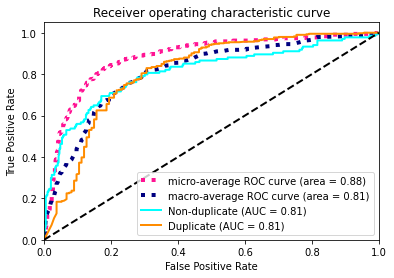

In [ ]:
plot_AUC_ROC(label_twoDimension_t,pred_test)